# 1. Create a plot that shows performance (AUC) of random forest models (x axis) with 10, 20, 30, … 200 (y axis) on training and testing data (build all 20 models to complete the assignment). Use highUtilizationPredictionV2wco dataset.

In [1]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect('C://Users//akhil//Desktop//HAP 880//Week 2//testclaims_hu.db')

In [3]:
df = pd.read_sql('select * from highUtilizationPredictionV2wco', conn)

In [4]:
df=df.join(pd.get_dummies(df.race))

In [5]:
df.head()

,index,race,age,patient_id,ELIX1,ELIX2,ELIX3,ELIX4,ELIX5,ELIX6,...,drugs_m11-12,HighUtilizationY2,claimCount,A,Am.N,B,H,O,U,W
0,0,B,71,PAT136597,0,0,0,0,0,1,...,1,1,160,0,0,1,0,0,0,0
1,1,A,86,PAT119838,0,0,0,0,0,0,...,0,0,24,1,0,0,0,0,0,0
2,2,W,70,PAT11289,1,0,0,0,0,0,...,0,0,52,0,0,0,0,0,0,1
3,3,W,75,PAT178745,0,0,0,0,1,0,...,0,0,15,0,0,0,0,0,0,1
4,4,W,77,PAT50922,0,0,0,0,1,0,...,4,0,66,0,0,0,0,0,0,1


In [6]:
cols=list(df.columns)

In [7]:
cols.remove('index')
cols.remove('race')
cols.remove('patient_id')
cols.remove('HighUtilizationY2')
cols.remove('claimCount')

In [8]:
sz=df.index.size

In [9]:
from sklearn.utils import shuffle
df=shuffle(df)

In [10]:
import numpy as np
rnd=np.random.rand(1,sz)
df['rnd']=list(rnd[0])
df=df.sort_values('rnd')

In [11]:
tr=df[:int(sz*0.8)] # split to training and testing
ts=df[int(sz*0.8):] # testing

#Random Forest classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf = RandomForestClassifier()

In [14]:
rf.fit(tr[cols], tr['HighUtilizationY2'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
probs_rf = rf.predict_proba(ts[cols])

In [16]:
res = pd.DataFrame()

In [17]:
res['HighUtilizationY2'] = ts['HighUtilizationY2']

In [18]:
res['rf'] = probs_rf[:,1]

In [19]:
res.head(10)

,HighUtilizationY2,rf
28917,0,0.0
95675,0,0.0
75263,0,0.0
71429,0,0.0
25050,0,0.0
23303,0,0.0
67478,0,0.0
92789,0,0.1
63791,0,0.0
14944,0,0.0


In [20]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

In [21]:
fpr_rf, tpr_rf, threshold_rf = roc_curve(res['HighUtilizationY2'] , res['rf'])

In [22]:
auc_rf = auc(fpr_rf ,tpr_rf)

In [23]:
print(auc_rf)

0.749849884458723


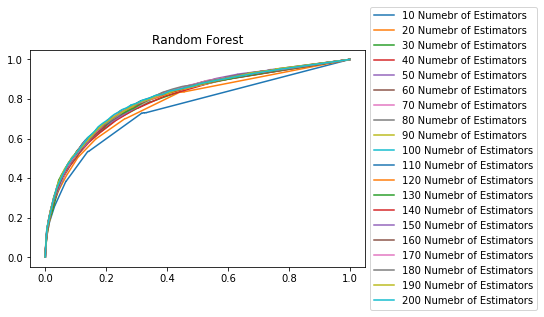

In [25]:
rf = dict()
probs_rf = dict()
fpr_rf = dict()
tpr_rf = dict() 
thresholds_rf = dict()
auc_rf = dict()
Auc =[]
Number_of_Estimators =[]
for n in range(10, 210, 10):
    rf[n]=RandomForestClassifier(n_estimators =n)
    rf[n].fit(tr[cols],tr['HighUtilizationY2'])
    probs_rf[n]=rf[n].predict_proba(ts[cols])
    fpr_rf[n], tpr_rf[n], thresholds_rf[n] = roc_curve(ts['HighUtilizationY2'],probs_rf[n][:,1])
    auc_rf[n]=auc(fpr_rf[n],tpr_rf[n])
    Auc.append(auc_rf[n])
    Number_of_Estimators.append(n)
    plt.title('Random Forest')
    plt.plot(fpr_rf[n], tpr_rf[n],label = "{} Numebr of Estimators".format(n))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [30]:
aucperf= pd.DataFrame({'No_of_Estimators':Number_of_Estimators,'Auc':Auc})

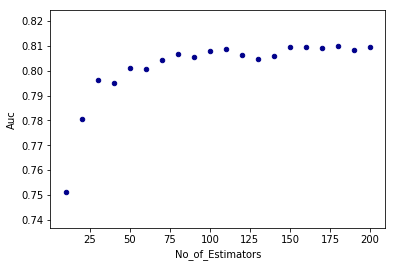

In [33]:
aucperf.plot.scatter(x='No_of_Estimators',y='Auc',c='DarkBlue')

# 2.Rank input attributes in the data. Create a plot that shows dependency between number of selected top attributes (x axis) and AUC of learned model (y axis). You can use any attribute selection method and any classifier you want. Use highUtilizationPredictionV2wco dataset 

In [34]:
from sklearn.feature_selection import mutual_info_classif

In [35]:
mic = mutual_info_classif(tr[cols], tr['HighUtilizationY2'])
mic

array([1.12597649e-03, 4.06188595e-03, 1.06800972e-03, 2.40597449e-03,
       2.15633034e-04, 1.21962857e-03, 1.46445578e-02, 1.56128893e-03,
       8.62538635e-03, 9.32680295e-03, 3.05668434e-03, 2.28040527e-03,
       3.37518042e-03, 9.59394372e-03, 1.63832402e-02, 2.99374701e-03,
       3.10255126e-03, 6.95929028e-04, 9.16070738e-03, 2.45657377e-03,
       0.00000000e+00, 9.83815759e-03, 8.13026623e-04, 2.79936231e-04,
       2.94490541e-03, 1.54746623e-03, 1.40415980e-02, 7.72507841e-03,
       1.06047984e-03, 5.68726230e-03, 1.17517963e-02, 3.35879675e-03,
       5.57356080e-05, 0.00000000e+00, 1.89217661e-02, 2.01946409e-03,
       0.00000000e+00, 3.13730374e-04, 0.00000000e+00, 1.96609481e-02,
       6.26211284e-03, 1.77164597e-02, 0.00000000e+00, 0.00000000e+00,
       1.15383230e-04, 1.48895134e-02, 1.81831363e-02, 1.47056816e-04,
       0.00000000e+00, 1.24090217e-02, 1.55692276e-02, 5.04391914e-04,
       4.78697167e-03, 3.76130397e-03, 4.83016780e-03, 4.90240840e-03,
      

In [36]:
s = pd.DataFrame()
s['att'] = cols
s['mic'] = mic

In [37]:
 from sklearn.feature_selection import chi2

In [38]:
chi2 = chi2(tr[cols], tr['HighUtilizationY2'])

In [39]:
s['chi2'] = chi2[0]

In [40]:
cols_sel_mic=s.sort_values('mic', ascending=False)['att'][:10]

In [41]:
col_sel_chi2=s.sort_values('chi2',ascending=False)['att'][:10]

#Using Top Attributes from mutual_info_classif for Random Forest Model

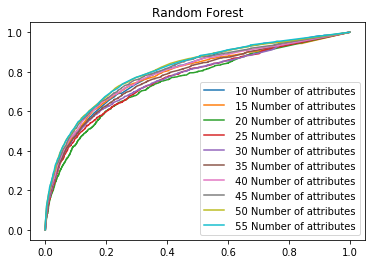

In [42]:
rf200=RandomForestClassifier(n_estimators=200)
Auc =[]
No_of_Attributes =[]
for n in range(10, 60, 5):
    cols_sel_mic=s.sort_values('mic', ascending=False)['att'][:n]
    rf200.fit(tr[cols_sel_mic],tr['HighUtilizationY2'])
    probs_rf200=rf200.predict_proba(ts[cols_sel_mic])
    fpr_rf200, tpr_rf200, thresholds_rf200 = roc_curve(ts['HighUtilizationY2'],probs_rf200[:,1])
    auc_rf200=auc(fpr_rf200,tpr_rf200)
    Auc.append(auc_rf200)
    No_of_Attributes.append(n)
    plt.title('Random Forest')
    plt.plot(fpr_rf200, tpr_rf200,label =" {} Number of attributes".format(n))
    plt.legend()

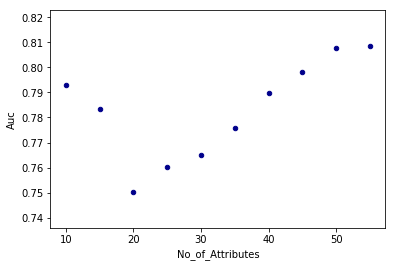

In [43]:
aucperf= pd.DataFrame({'No_of_Attributes':No_of_Attributes,'Auc':Auc})
aucperf.plot.scatter(x='No_of_Attributes',y='Auc',c='DarkBlue')

# 3.Create a learning curve for the data to check AUC (y axis) based on size of data (x axis).

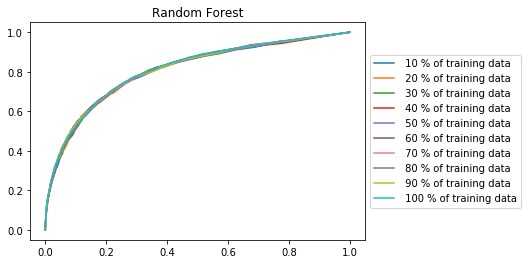

In [44]:
rf200=RandomForestClassifier(n_estimators=200)
tr=df[:int(sz*0.8)] 
ts=df[int(sz*0.8):]
Data_sz=[]
Auc = []
for n in range (10 ,110 ,10):
    tr_new= tr[:int(sz*n/100)]
    rf200.fit(tr_new[cols],tr_new['HighUtilizationY2'])
    probs_rf200=rf200.predict_proba(ts[cols])
    fpr_rf200, tpr_rf200, thresholds_rf200 = roc_curve(ts['HighUtilizationY2'],probs_rf200[:,1])
    auc_rf200=auc(fpr_rf200,tpr_rf200)
    Auc.append(auc_rf200)
    Data_sz.append(n)
    plt.title('Random Forest')
    plt.plot(fpr_rf200, tpr_rf200, label = " {} % of training data".format(n))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

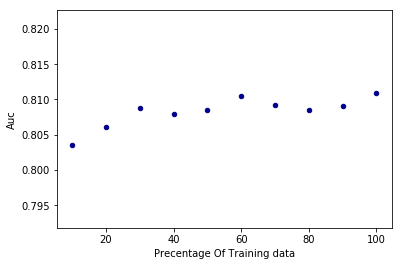

In [46]:
aucperf= pd.DataFrame({'Precentage Of Training data':Data_sz,'Auc':Auc})
aucperf.plot.scatter(x='Precentage Of Training data',y='Auc',c='DarkBlue')

# 4. Create 5 more learning curves (on one plot) for different numbers of input attributes. Do it for random forest, logistic regression, and naïve Bayes.

#a. Use random selection of input attributes

In [47]:
import random
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [48]:
rf200=RandomForestClassifier(n_estimators=200)
lr = LogisticRegression()
gnb = GaussianNB()

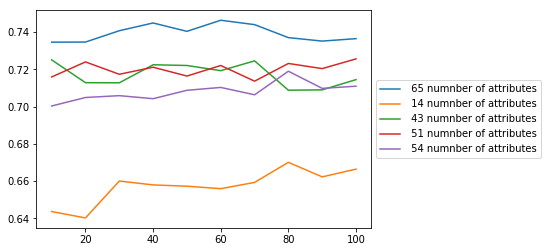

In [74]:
rf200=RandomForestClassifier(n_estimators=10)
tr=df[:int(sz*0.8)] 
ts=df[int(sz*0.8):]
for i in range(5):
    Data_sz=[]
    Auc = []
    No_atributes=[]
    random.shuffle(cols)
    no_attri=random.randint(10,len(cols))
    cols_rand=cols[ :no_attri]
    for n in range (10 ,110 ,10):
        tr_new= tr[:int(sz*n/100)]
        rf200.fit(tr_new[cols_rand],tr_new['HighUtilizationY2'])
        probs_rf200=rf200.predict_proba(ts[cols_rand])
        fpr_rf200, tpr_rf200, thresholds_rf200 = roc_curve(ts['HighUtilizationY2'],probs_rf200[:,1])
        auc_rf200=auc(fpr_rf200,tpr_rf200)
        Auc.append(auc_rf200)
        Data_sz.append(n)
        #No_atributes.append(no_attri)
    plt.plot(Data_sz, Auc,label = " {} numnber of attributes".format(no_attri))
    plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

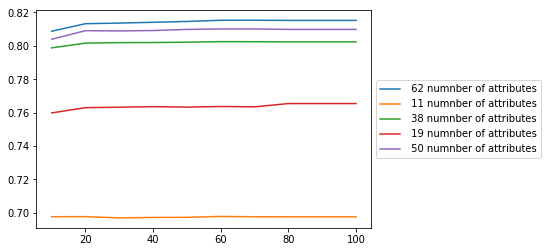

In [75]:
tr=df[:int(sz*0.8)] 
ts=df[int(sz*0.8):]
for i in range(5):
    Data_sz=[]
    Auc = []
    No_atributes=[]
    random.shuffle(cols)
    no_attri=random.randint(10,len(cols))
    cols_rand=cols[ :no_attri]
    for n in range (10 ,110 ,10):
        tr_new= tr[:int(sz*n/100)]
        lr.fit(tr_new[cols_rand],tr_new['HighUtilizationY2'])
        probs_lr=lr.predict_proba(ts[cols_rand])
        fpr_lr, tpr_lr, thresholds_lr = roc_curve(ts['HighUtilizationY2'],probs_lr[:,1])
        auc_lr=auc(fpr_lr,tpr_lr)
        Auc.append(auc_lr)
        Data_sz.append(n)
        #No_atributes.append(no_attri)
    plt.plot(Data_sz, Auc,label = " {} numnber of attributes".format(no_attri))
    plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

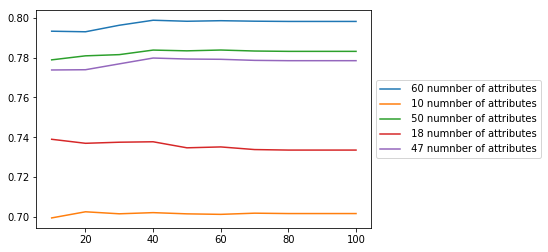

In [76]:
tr=df[:int(sz*0.8)] 
ts=df[int(sz*0.8):]
for i in range(5):
    Data_sz=[]
    Auc = []
    No_atributes=[]
    random.shuffle(cols)
    no_attri=random.randint(10,len(cols))
    cols_rand=cols[ :no_attri]
    for n in range (10 ,110 ,10):
        tr_new= tr[:int(sz*n/100)]
        gnb.fit(tr_new[cols_rand],tr_new['HighUtilizationY2'])
        probs_gnb=gnb.predict_proba(ts[cols_rand])
        fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(ts['HighUtilizationY2'],probs_gnb[:,1])
        auc_gnb=auc(fpr_gnb,tpr_gnb)
        Auc.append(auc_gnb)
        Data_sz.append(n)
        #No_atributes.append(no_attri)
    plt.plot(Data_sz, Auc,label = " {} numnber of attributes".format(no_attri))
    plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#b. Use ranking of attributes from question 2

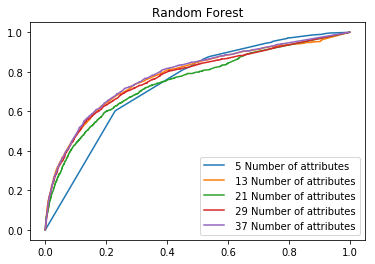

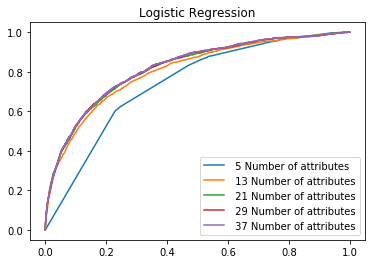

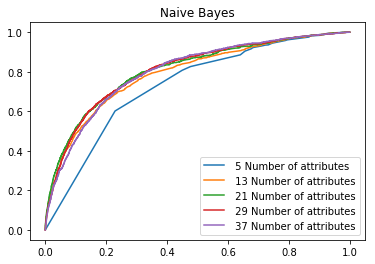

In [41]:
for n in range(5, 40, 8):
    cols_sel_mic=s.sort_values('mic', ascending=False)['att'][:n]
    rf200.fit(tr[cols_sel_mic],tr['HighUtilizationY2'])
    probs_rf200=rf200.predict_proba(ts[cols_sel_mic])
    fpr_rf200, tpr_rf200, thresholds_rf200 = roc_curve(ts['HighUtilizationY2'],probs_rf200[:,1])
    auc_rf200=auc(fpr_rf200,tpr_rf200)
    plt.figure(1)
    plt.title('Random Forest')
    plt.plot(fpr_rf200, tpr_rf200,label =" {} Number of attributes".format(n))
    plt.legend()
    lr.fit(tr[cols_sel_mic],tr['HighUtilizationY2'])
    probs_lr=lr.predict_proba(ts[cols_sel_mic])
    fpr_lr, tpr_lr, thresholds_lr = roc_curve(ts['HighUtilizationY2'],probs_lr[:,1])
    auc_lr=auc(fpr_lr,tpr_lr)
    plt.figure(2)
    plt.title('Logistic Regression')
    plt.plot(fpr_lr, tpr_lr, label = " {} Number of attributes".format(n))
    plt.legend()
    gnb.fit(tr[cols_sel_mic],tr['HighUtilizationY2'])
    probs_gnb=gnb.predict_proba(ts[cols_sel_mic])
    fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(ts['HighUtilizationY2'],probs_gnb[:,1])
    auc_gnb=auc(fpr_gnb,tpr_gnb)
    plt.figure(3)
    plt.title('Naive Bayes')
    plt.plot(fpr_gnb, tpr_gnb, label = " {} Number of attributes".format(n))
    plt.legend()